# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


#Data

- You have been provided with a leads dataset from the past with around 9000 data points. 
- This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. 
- which may or may not be useful in ultimately deciding whether a lead will be converted or not. 

- The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 
- You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. 

- Another thing that you also need to check out for are the levels present in the categorical variables. 
- Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Goals of the Case Study

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Results Expected

- A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
- The word document filled with solutions to all the problems.
- The overall approach of the analysis in a presentation
- Mention the problem statement and the analysis approach briefly 
- Explain the results in business terms
- Include visualisations and summarise the most important results in the presentation
- A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

## You need to submit the following four components:

1. **Python commented file** : Should include detailed comments and should not contain unnecessary pieces of code.
1. **Word File**: Answer all the questions asked by the company in the word document provided.
1. **Presentation**:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
1. **PDF File**: Write the summary report in a word file and submit it as a PDF.

In [1]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the required libraries and packages  
import numpy as np
import pandas as pd

#importing libraries for visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

#inbuilt module calendar that handles operations related to the calendar
import calendar

#importing Scikit learn library for train test split
import sklearn
from sklearn.model_selection import train_test_split

#for scaling the fatures
from sklearn.preprocessing import MinMaxScaler

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#statsmodel package
import statsmodels.api as sm  

from sklearn import metrics

#for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Importing the Data

In [3]:
#importing dataset to csv

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [4]:
print(leads.shape)

(9240, 37)


This dataset has:

9240 rows,
37 columns

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# check for duplicates in columns "Prospect ID" and "Lead Number" as these are indicative of ID numbers of Contacted people.
# these won't be any use in the analysis, so these can be dropped before we start further analysis.

print(sum(leads.duplicated(subset = 'Prospect ID')) == 0)
print(sum(leads.duplicated(subset = 'Lead Number')) == 0)


True
True


## Step 3: Exploratory Data Analysis: Data Cleaning & Visualisation

In [8]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Data Cleaning & Treatment:

#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### As we have noted from given instruction the dataframe contains some **Select** values it means these are the Missing values (not selected)

In [11]:
# Replacing Select values with nan values
leads = leads.replace('Select', np.nan)

In [12]:
leads.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Co

In [13]:
#checking null values in each rows

(round(100*(leads.isnull().sum()/len(leads.index)), 2)).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [14]:
#dropping cols with more than 45% missing values

cols = leads.columns

for i in cols:
    if round(100*(leads[i].isnull().sum()/len(leads.index)), 2) >= 45:
        leads.drop(i, axis = 1, inplace = True)
    

In [15]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [16]:
leads.shape

(9240, 28)

In [17]:
#checking null values in each rows again

(round(100*(leads.isnull().sum()/len(leads.index)), 2)).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [18]:
#Column Country has 26% missing values. Snce it's categorical field let's check value counts of Country column and replace the NAN with mode.

leads['Country'].value_counts(dropna = False)



India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

leads['Country'] = leads['Country'].replace(np.NAN, 'India')

leads['Country'].isnull().sum()

0

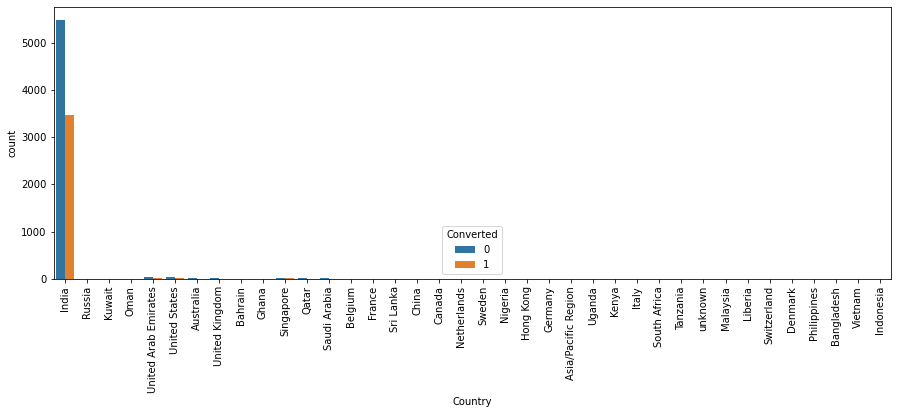

In [20]:
#plotting spread of Country columnn after replacing NaN values

# before that let's create a def function for further univariate analysis

def Univariate_analysis(col):
    plt.figure(figsize=(15,5))
    sns.countplot(x = col,data = leads, hue=leads.Converted)
    plt.xticks(rotation = 90)
    return plt.show()



Univariate_analysis("Country")

In [21]:
#As the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

#creating a list of columns to be droppped later

cols_to_drop=['Country']

In [22]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
# replacing NAN with mode i.e 'Mumbai'

leads['City'] = leads['City'].replace(np.NAN, 'Mumbai')

In [24]:
leads['City'].value_counts(dropna=False)  # missing values treated

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

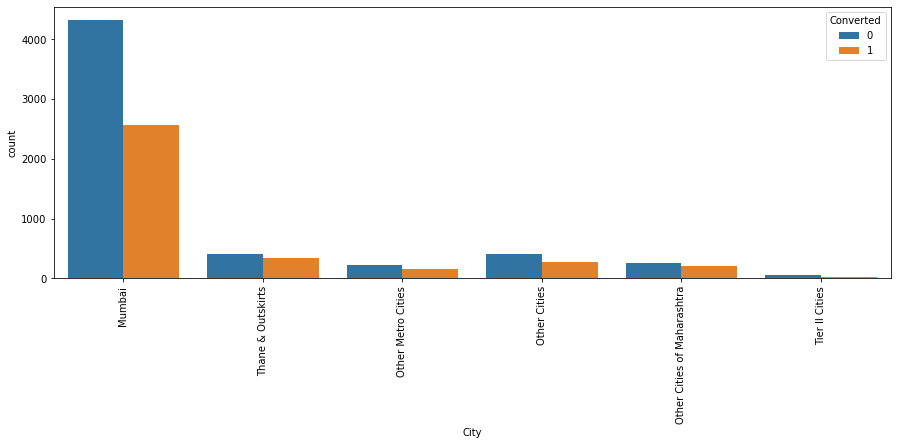

In [25]:
#plotting spread of City columnn after replacing NaN values

Univariate_analysis("City")

In [26]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# Most of the Leads may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'
# So, let's replace NAN with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.NAN, 'Not Specified')
leads['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

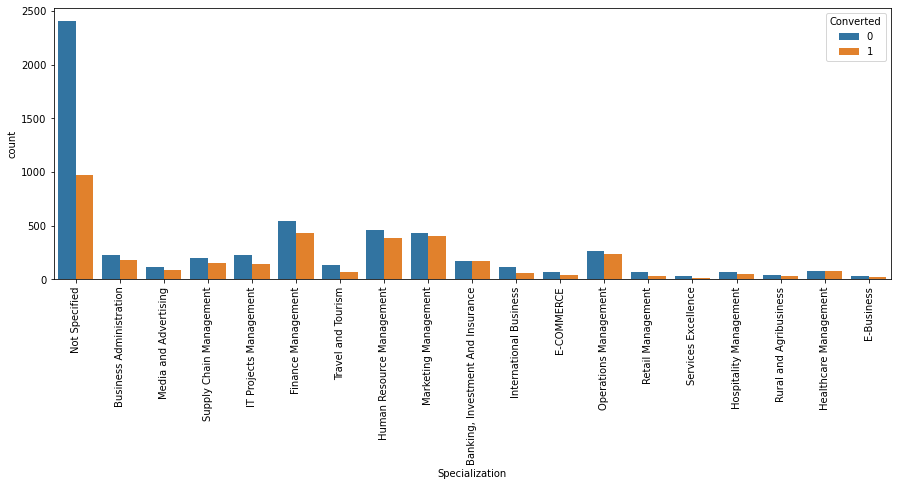

In [28]:
#plotting spread of Specialization columnn 

Univariate_analysis("Specialization")

Insights:
    
Specialization with Management have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [29]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [30]:
leads['Specialization'].value_counts()

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [31]:
# Analyse 'What is your current occupation' column

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unknown')

In [33]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

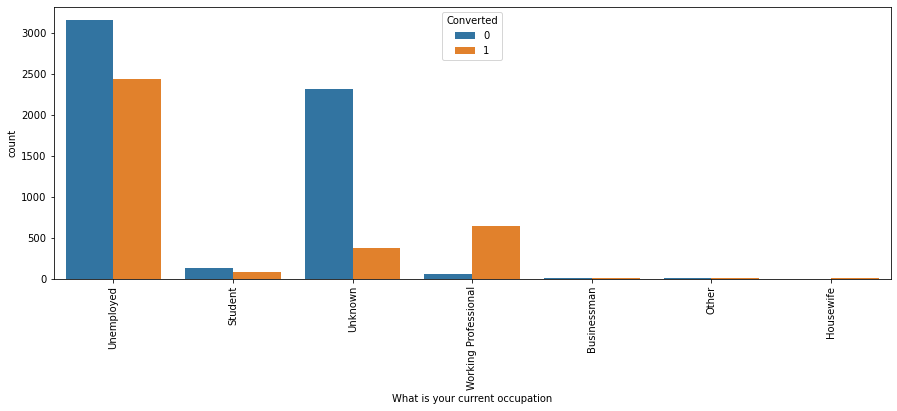

In [34]:
#visualizing count of Variable based on Converted value

Univariate_analysis("What is your current occupation")

### Insight:

Working Professionals going for the course have high chances rate of joining it.

Unemployed leads are the most in terms of absolute numbers.

In [35]:
# Analyse 'What matters most to you in choosing a course' column

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [36]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

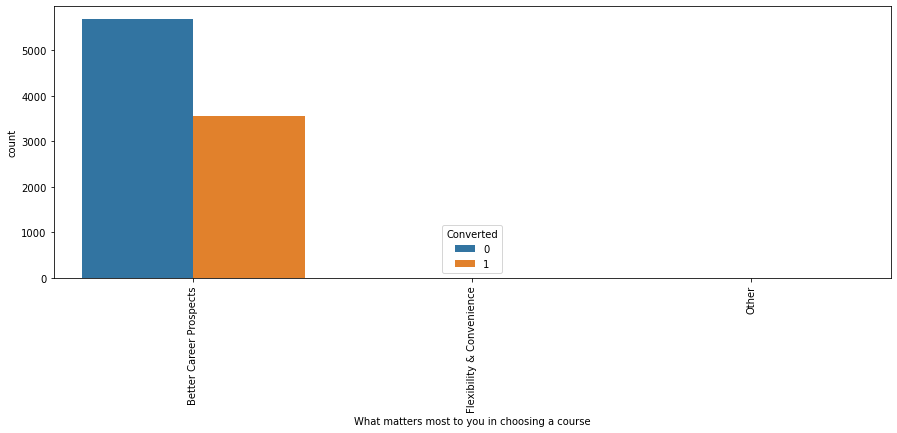

In [37]:
#visualizing count of 'What matters most to you in choosing a course' based on Converted value

Univariate_analysis("What matters most to you in choosing a course")

In [38]:
leads['What matters most to you in choosing a course'].value_counts(normalize= True)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

Insight:
    
1. The reason to choose the course for 99% leads was 'Better Career Prospects'. 

1. As we have already established that this variable worth dropping and can be appended to list cols_to_drop

In [39]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [40]:
#checking value counts of variable Tag

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [41]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

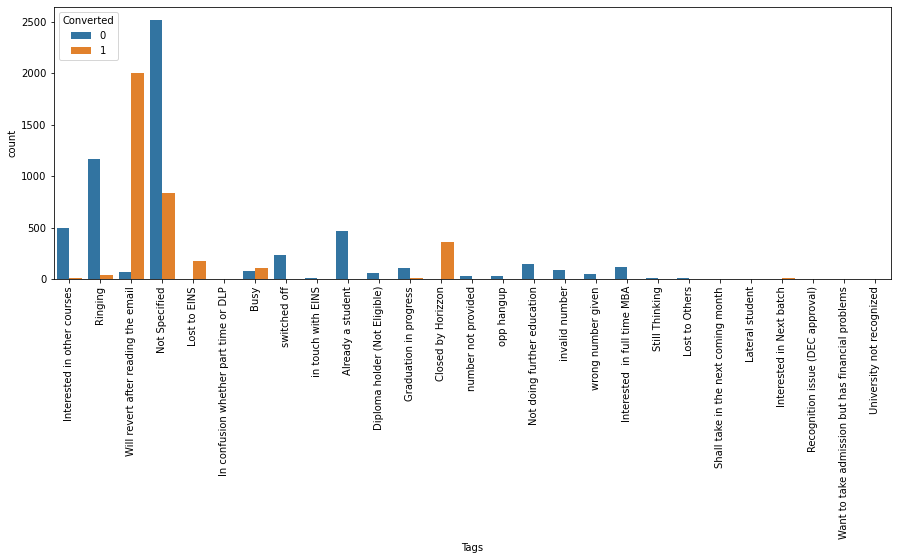

In [42]:
#visualizing count of Variable based on Converted value

Univariate_analysis("Tags")

In [43]:
leads['Tags'].value_counts(normalize = True)*100

Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [44]:
#replacing tags with low frequency with "Other Tags" except those which has good Convert rate.

leads['Tags'] = leads['Tags']. replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')

leads['Tags'].value_counts(normalize = True)*100

Not Specified                          36.287879
Will revert after reading the email    22.424242
Other_Tags                             14.935065
Ringing                                13.019481
Interested in other courses             5.551948
Closed by Horizzon                      3.874459
Busy                                    2.012987
Lost to EINS                            1.893939
Name: Tags, dtype: float64

In [45]:
#checking remaining null values in each rows

(round(100*(leads.isnull().sum()/len(leads.index)), 2)).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Magazine                                         0.00
Newspaper Article                                0.00
Search                      

In [46]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [47]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace([np.nan,'bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'],'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

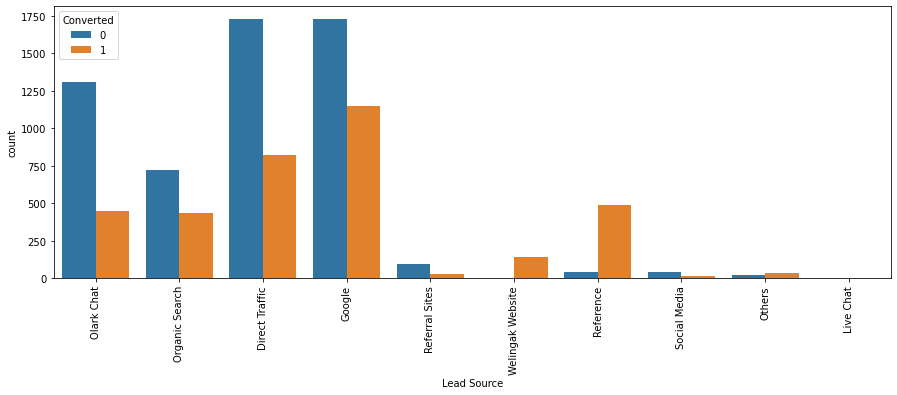

In [48]:
Univariate_analysis("Lead Source")

Insights:
    
1. Maximum number of leads generated by Google and Direct Traffic.
1. Conversion rate is higher of leads from Reference and Wellingak Website
1. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.


In [49]:
# checking value counts of Last Activity column:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [51]:
# Let's check null values again
(round(100*(leads.isnull().sum()/len(leads.index)), 2)).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Magazine                                         0.00
Lead Source                                      0.00
Search                                           0.00
What matters most to you in 

In [52]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [53]:
# checking value counts of column:Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

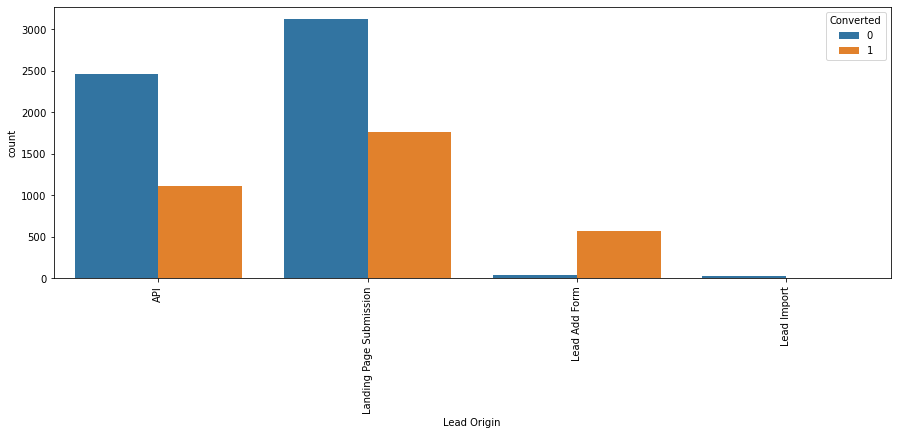

In [54]:
#visualizing count of Variable based on Converted value

Univariate_analysis("Lead Origin")

Insights:
    
1. API and Landing Page Submission has higher number of leads as well as conversion.
1. Lead Add Form has a very high conversion rate but count of leads are not very high.
1. Lead Import and Quick Add Form get very few leads.
1. It's recommened to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [55]:
# let's check for imbalacing for rest of the columns with boolean values

In [56]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
cols = ['Do Not Email', 'Do Not Call',
       'Converted','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

for i in cols:
    print(leads[i].value_counts(normalize=True)*100)

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64
No     99.978029
Yes     0.021971
Name: Do Not Call, dtype: float64
0    61.979567
1    38.020433
Name: Converted, dtype: float64
No     99.846205
Yes     0.153795
Name: Search, dtype: float64
No    100.0
Name: Magazine, dtype: float64
No     99.978029
Yes     0.021971
Name: Newspaper Article, dtype: float64
No     99.989015
Yes     0.010985
Name: X Education Forums, dtype: float64
No     99.989015
Yes     0.010985
Name: Newspaper, dtype: float64
No     99.956058
Yes     0.043942
Name: Digital Advertisement, dtype: float64
No     99.923102
Yes     0.076898
Name: Through Recommendations, dtype: float64
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
No    100.0
Name: Get updates on DM Content, dtype: float64
No    100.0
Name: I agree to pay the amount through cheque, dtype: float64
No     68.274195
Yes    31.725805
Name: A free

Insight:
    
Most of the above variables have 99% - 100% same response which indicates data imbalance.

In [58]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Do Not Call','Search', 
                     'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
                     'Digital Advertisement', 'Through Recommendations',
                     'Receive More Updates About Our Courses', 
                     'Update me on Supply Chain Content', 'Get updates on DM Content',
                     'I agree to pay the amount through cheque'])

cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [59]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [60]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                         'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                         'Resubscribed to emails',
                                                                         'View in browser link Clicked',
                                                                         'Approached upfront', 
                                                                         'Form Submitted on Website', 
                                                                         'Email Received'],'Other_Notable_activity')

leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

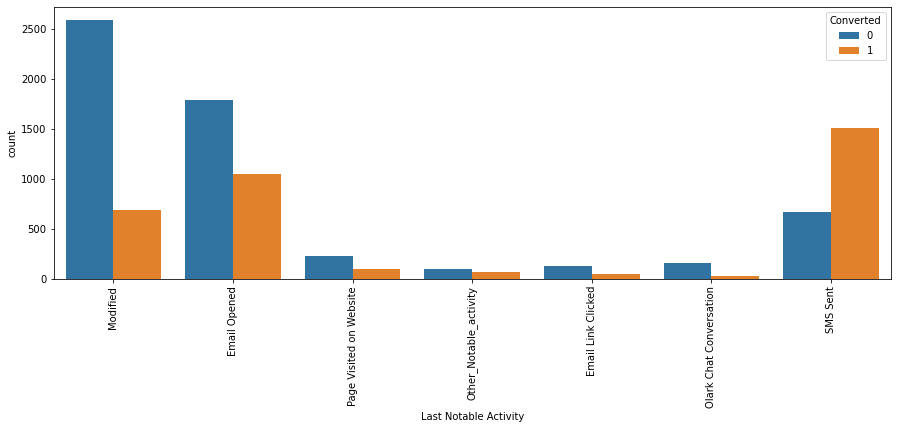

In [61]:
#visualizing count of Variable based on Converted value

Univariate_analysis("Last Notable Activity")

In [62]:
#dropping columns
leads = leads.drop(cols_to_drop,axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [63]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_cat = leads.select_dtypes(include=['object']).columns
col_num = leads.select_dtypes(include=['float64', 'int64']).columns





print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_cat,col_num))

columns with object dtype 
 Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object') 
 
 columns with number dtype 
 Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


In [64]:
# Numerical Attributes Analysis:

In [65]:
# Target Variable = "Converted"

leads['Converted'].value_counts(normalize = True)*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

In [66]:
# Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

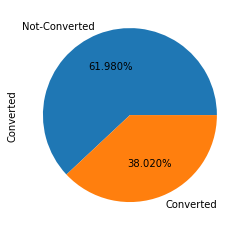

<Figure size 360x360 with 0 Axes>

In [67]:
# let's visualize the Convert/ Not_Converted

leads.Converted.apply(lambda x: "Converted" if x == 1 else "Not-Converted").value_counts().plot.pie(normalize = True, autopct='%1.03f%%')
plt.figure(figsize = (5,5))
plt.show()

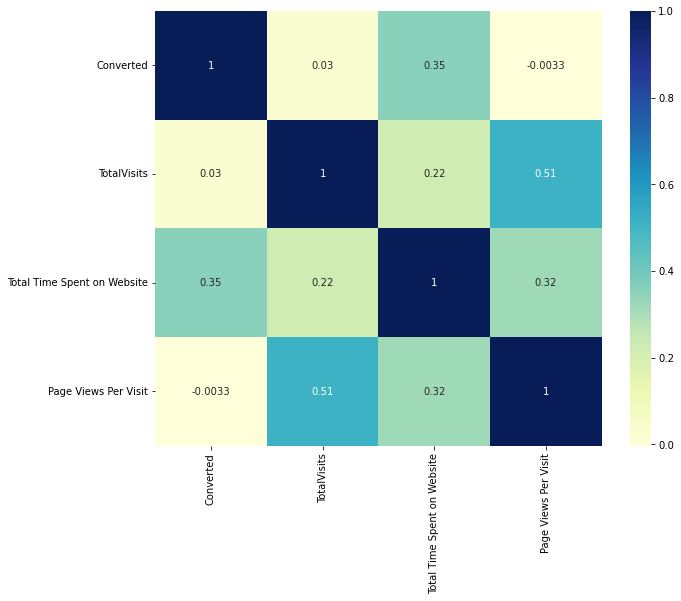

In [68]:
#Checking correlations of numeric values

plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

Insights:
    
1. Page Views Per Visit & TotalVisits are highly correleted with each other
1. Converted has the highest correlation with Total Time Spent on Website
1. Total Time Spent on Website and TotalVisits are also correlated with each other
1. Page Views Per Visit and Converted are negatively correlated


In [69]:
## Finding and Handling Outliers

In [70]:
Numeric_cols  = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

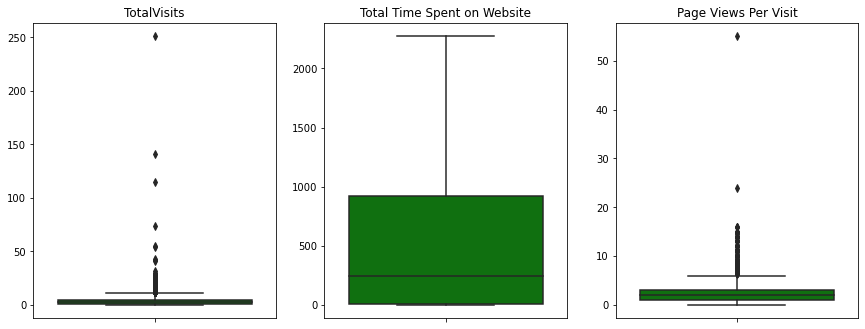

In [71]:
import itertools
plt.figure(figsize=[20,25])
for i,j in itertools.zip_longest(Numeric_cols, range(len(Numeric_cols))):
    plt.subplot(4,4,j+1)
    sns.boxplot(y = leads[i], color = "green")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

Outliers are Present in both the Variables TotalVisits and Page Views Per Visit it should be treated and the value spreaded above median high in Total Time Spent on Website.

In [72]:
corrs = leads.corr()
corrs

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.354939,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


#### Approach:

It's very much depands on the business requirements whether management wants to have a complete picture with outliers present or keep it separate for other analysis.

Here, we follow the approach to treat the outliers for attributes "TotalVisits" and "Page Views Per Visit" by using flooring and caping method

In [73]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [74]:
#Outlier Treatment: using Flooring & Capping Method

cont_cols = ["TotalVisits", "Page Views Per Visit"]

for var in cont_cols:
    q1 = leads[var].describe()['25%']
    q3 = leads[var].describe()['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    leads[var] = np.where(leads[var] < lower_bound, lower_bound, leads[var]) #flooring
    leads[var] = np.where(leads[var] > upper_bound, upper_bound, leads[var]) #capping

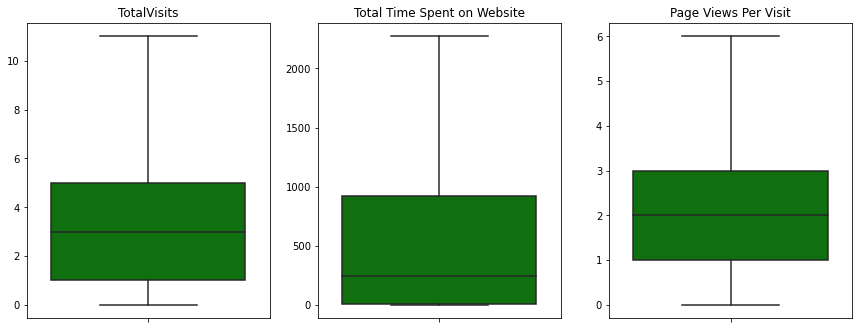

In [75]:
# Visualize outliers

plt.figure(figsize=[20,25])
for i,j in itertools.zip_longest(Numeric_cols, range(len(Numeric_cols))):
    plt.subplot(4,4,j+1)
    sns.boxplot(y = leads[i], color = "green")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [76]:
leads.shape

(9103, 14)

In [77]:
# Bivariate Analysis of continouse columns

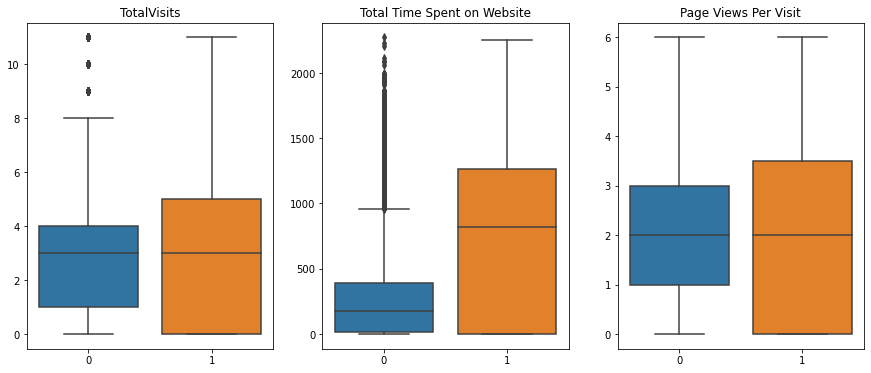

In [78]:
import itertools
plt.figure(figsize=[15, 6])
for i,j in itertools.zip_longest(Numeric_cols, range(len(Numeric_cols))):
    plt.subplot(1,3,j+1)
    sns.boxplot(x = leads.Converted, y = leads[i])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

#### Insight:

**Total Visits**
Median for converted and not converted leads are the close.
Nothng conclusive can be said on the basis of Total Visits


**Total Time Spent on Website**
Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

**Page Views Per Visit**
Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

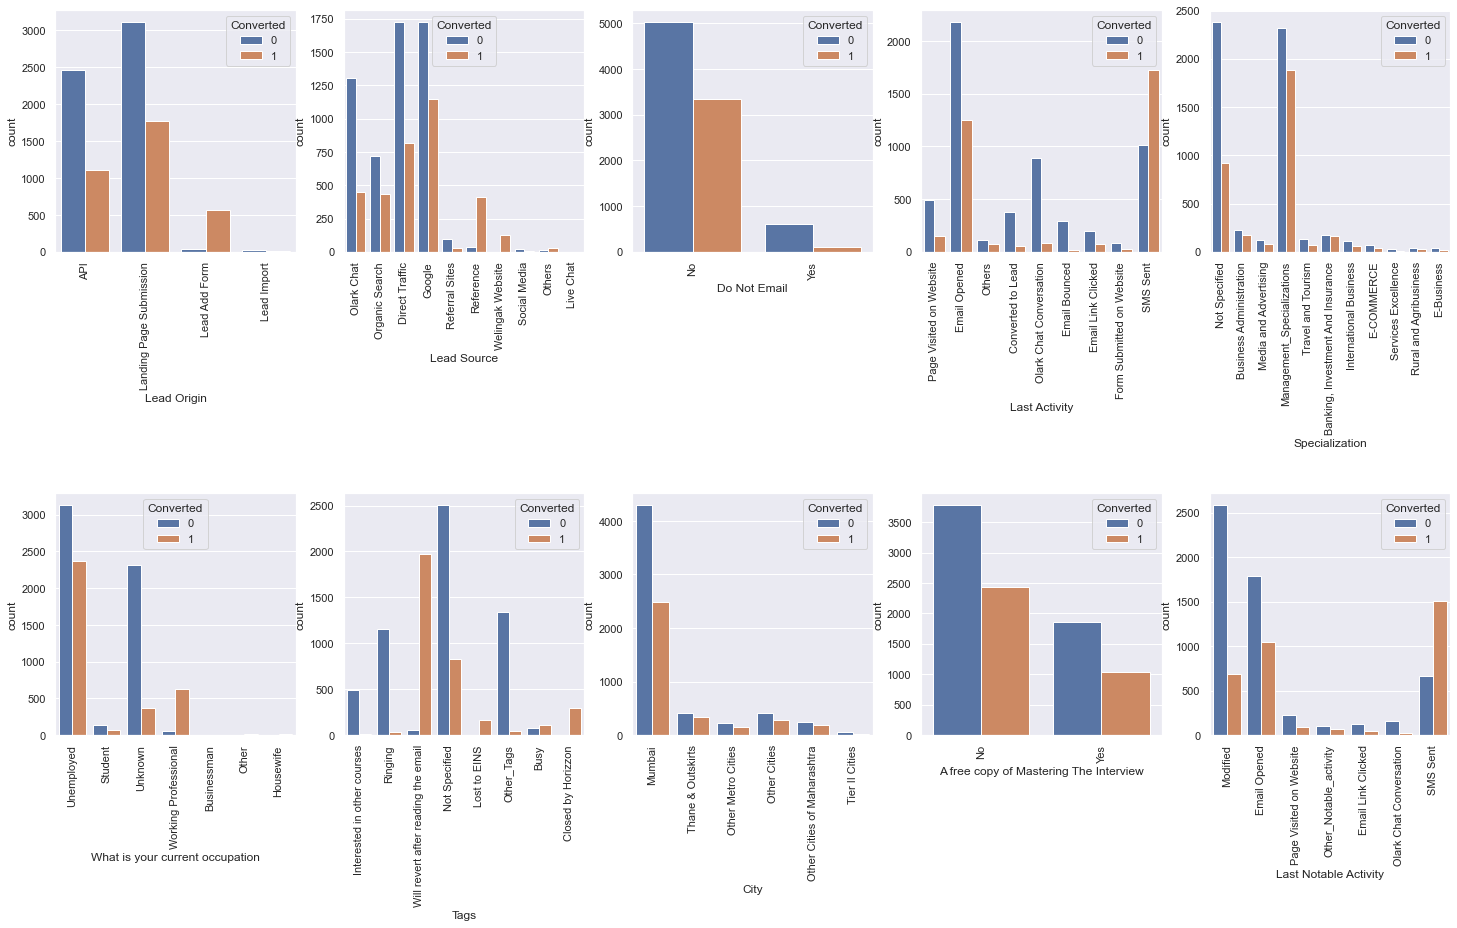

In [79]:
# plotting countplot for object dtype to get data distribution

plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1)
for i in enumerate(col_cat):
    plt.subplot(5,5, i[0]+1)
    sns.countplot(i[1] , data=leads, hue ='Converted') 
    plt.xticks(rotation=90)
plt.show()

In [80]:
# percentage of retained data

print(len(leads.index))
print(len(leads.index)/9240)

9103
0.9851731601731601


## Step:4 Data preparation for Modelling

In [81]:
print(col_cat)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [82]:
#Converting some binary variables (Yes/No) to 0/1

leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, "No": 0})
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})

In [83]:
# Dummy Variable Creation:

In [84]:
#getting dummies and dropping the first column and adding the results to the master dataframe
# list of columns for which dummies need to be created

cols_to_dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                 'What is your current occupation', 'Tags', 'City',
                 'Last Notable Activity']


dummy = pd.get_dummies(leads[['Lead Origin','City']], drop_first=True) # drop first dummy column
leads = pd.concat([leads,dummy],1)

dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = "What is your current occupation")
dummy = dummy.drop(['What is your current occupation_Unknown'], 1)  # droping the least relevant dummy category
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)  # droping the least relevant dummy category
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)  # droping the least relevant dummy category
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)   # droping the least relevant dummy category
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)    # droping the least relevant dummy category
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)   # droping the least relevant dummy category
leads = pd.concat([leads, dummy], axis = 1)

leads.shape

(9103, 68)

In [85]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,1


In [86]:
#dropping the original columns after dummy variable creation

leads.drop(cols_to_dummy, axis = 1, inplace = True)

In [87]:
leads.shape

(9103, 60)

## Step 5: Splitting the Data into Test-Train Set

In [88]:
## Train-Test Split & Logistic Regression Model Building:

X = leads.drop('Converted', axis=1)
y = leads['Converted']

print(X.shape)
print(y.shape)

(9103, 59)
(9103,)


In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6372, 59)
(2731, 59)
(6372,)
(2731,)


## Step 6: Feature Scaling

In [90]:
#scaling numeric columns

scaler = MinMaxScaler()

X_train[Numeric_cols] = scaler.fit_transform(X_train[Numeric_cols])  # fit the scaling

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7962,0,0.272727,0.570794,0.250000,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5520,0,0.636364,0.026631,1.000000,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1962,0,0.454545,0.075011,0.416667,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1566,0,1.000000,0.550821,0.583333,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,...,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.00000,6372.000000,6372.000000
mean,0.079567,0.293757,0.213330,0.376678,0.316855,0.536566,0.067797,0.004080,0.076899,0.048807,...,0.021186,0.036095,0.240584,0.019460,0.034683,0.060107,0.020088,0.15317,0.128845,0.219554
std,0.270643,0.263604,0.242150,0.299240,0.465287,0.498700,0.251416,0.063752,0.266452,0.215482,...,0.144017,0.186542,0.427472,0.138146,0.182990,0.237703,0.140312,0.36018,0.335055,0.413977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.090909,0.003995,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.272727,0.107856,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.454545,0.407457,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Step 7: Looking at Correlations

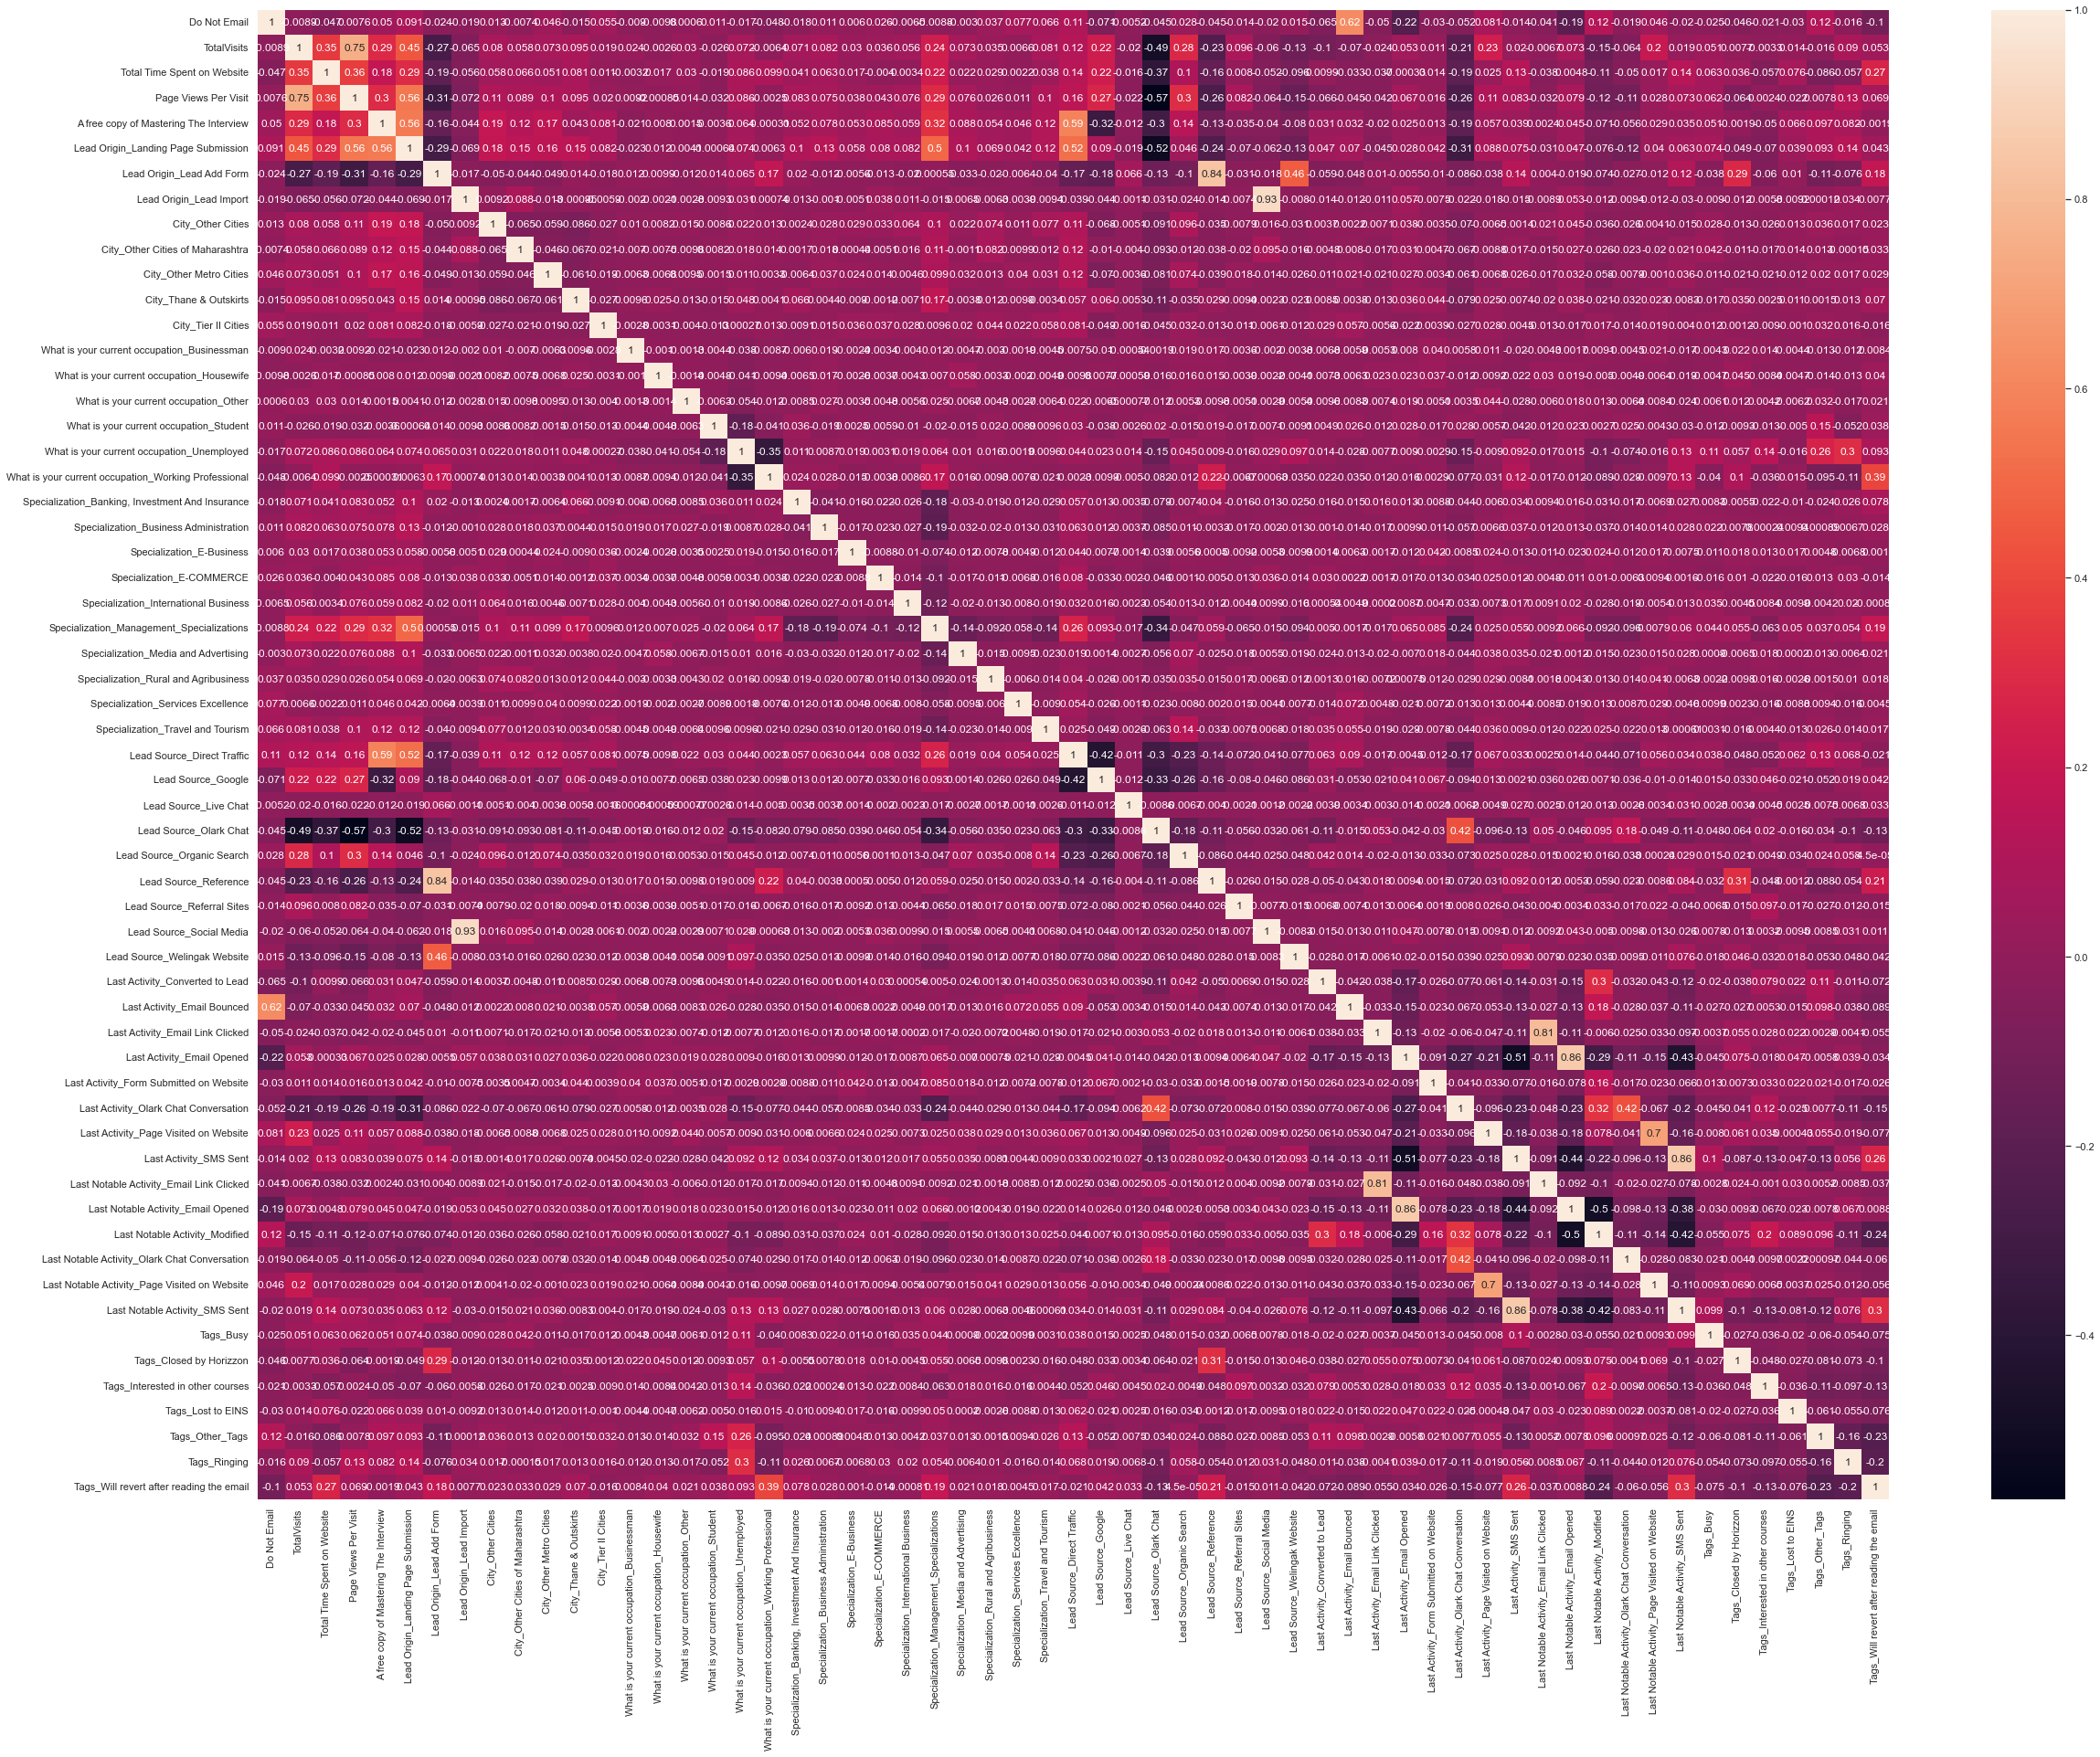

In [92]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        
sns.heatmap(X_train.corr(),annot = True)
plt.show()

There are large number of features present in the data hence correlation matrix is not properly visible at this stage. Picture will be more clear after feature selection for modelling

## Step 8: Model Building

In [93]:
#Running Your First Training Model

In [94]:
# Logistic regression model with all attributes

logm1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1055.8
Date:                Tue, 15 Nov 2022   Deviance:                       2111.7
Time:                        20:40:00   Pearson chi2:                 1.09e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6308
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7778      1.012     -0.768      0.442      -2.762       1.206
Do Not Email                                            -1.0265      0.316     -3.248      0.001      -1.646      -0.407
TotalVisits                                              1.3592      0.350      3.884      0.000       0.673       2.045
Total Time Spent on Website                              4.3284      0.279     15.513      0.000       3.782       4.875
Page Views Per Visit                                    -1.2457      0.358     -3.478      0.001      -1.948      -0.544
A free copy of Mastering The Interview                  -0.1597      0.187     -0.852      0.394      -0.527       0.207
Lead Origin_Landing Page Submission                     -0.3087      0.242     -1.275      0.202      -0.783       0.166
Lead Origin_Lead Add Form                                0.0676      1.289      0.052      0.958      -2.459       2.595
Lead Origin_Lead Import                                  1.0265      1.700      0.604      0.546      -2.305       4.358
City_Other Cities                                       -0.2253      0.245     -0.920      0.357      -0.705       0.255
City_Other Cities of Maharashtra                        -0.3170      0.280     -1.131      0.258      -0.866       0.232
City_Other Metro Cities                                  0.3214      0.308      1.044      0.297      -0.282       0.925
City_Thane & Outskirts                                   0.0255      0.243      0.105      0.916      -0.450       0.502
City_Tier II Cities                                      0.7765      0.606      1.281      0.200      -0.412       1.965
What is your current occupation_Businessman              1.8454      1.323      1.395      0.163      -0.747       4.438
What is your current occupation_Housewife               22.1052   1.68e+04      0.001      0.999   -3.29e+04     3.3e+04
What is your current occupation_Other                    3.3664      1.454      2.315      0.021       0.516       6.216
What is your current occupation_Student                  2.3768      0.616      3.861      0.000       1.170       3.583
What is your current occupation_Unemployed               2.6851      0.167     16.037      0.000       2.357       3.013
What is your current occupation_Working Professional     3.0700      0.393      7.808      0.000       2.299       3.841
Specialization_Banking, Investment And Insurance         0.4564      0.388      1.176      0.240      -0.304       1.217
Specialization_Business Administration                   0.2249      0.360      0.624      0.533      -0.482       0.931
Specialization_E-Business                                0

#### We are going to use hybrid approach here for feature selection i.e. RFE + Manual elimination technique

## Step 9: Feature Selection Using RFE

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [96]:
from sklearn.feature_selection import RFE

rfe = RFE(lr, n_features_to_select = 12)
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('City_Other Cities', False, 33),
 ('City_Other Cities of Maharashtra', False, 25),
 ('City_Other Metro Cities', False, 32),
 ('City_Thane & Outskirts', False, 47),
 ('City_Tier II Cities', False, 24),
 ('What is your current occupation_Businessman', False, 15),
 ('What is your current occupation_Housewife', False, 9),
 ('What is your current occupation_Other', False, 6),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 30),
 ('Specialization_Business Administration', Fal

In [99]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [100]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Di

## Step 7: Assessing the model with StatsModels

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1212.1
Date:                Tue, 15 Nov 2022   Deviance:                       2424.2
Time:                        20:40:02   Pearson chi2:                 7.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3544      0.114    -29.473      0.000      -3.577      -3.131
Total Time Spent on Website                              3.5391      0.223     15.840      0.000       3.101       3.977
Lead Origin_Lead Add Form                                1.7017      0.414      4.106      0.000       0.889       2.514
What is your current occupation_Unemployed               2.3798      0.127     18.728      0.000       2.131       2.629
What is your current occupation_Working Professional     2.4240      0.354      6.855      0.000       1.731       3.117
Lead Source_Welingak Website                             1.9475      0.838      2.323      0.020       0.305       3.590
Last Activity_SMS Sent                                   1.8814      0.116     16.249      0.000       1.654       2.108
Tags_Closed by Horizzon                                  4.5285      0.734      6.173      0.000       3.091       5.966
Tags_Interested in other courses                        -3.8933      0.369    -10.557      0.000      -4.616      -3.171
Tags_Lost to EINS                                        5.4260      0.735      7.384      0.000       3.986       6.866
Tags_Other_Tags                                         -3.9773      0.223    -17.843      0.000      -4.414      -3.540
Tags_Ringing                                            -4.7483      0.256    -18.537      0.000      -5.250      -4.246
Tags_Will revert after reading the email                 3.0131      0.199     15.130      0.000       2.623       3.403
========================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [102]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.259149
5520    0.293116
1962    0.057053
1566    0.982573
9170    0.007021
5097    0.033752
8954    0.037921
309     0.920685
5519    0.186483
1050    0.977005
dtype: float64

In [103]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25914922, 0.29311634, 0.05705266, 0.98257255, 0.0070206 ,
       0.03375211, 0.03792076, 0.9206852 , 0.18648306, 0.97700503])

In [104]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.259149,7962
1,0,0.293116,5520
2,0,0.057053,1962
3,1,0.982573,1566
4,0,0.007021,9170


In [105]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.259149,7962,0
1,0,0.293116,5520,0
2,0,0.057053,1962,0
3,1,0.982573,1566,1
4,0,0.007021,9170,0


In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3801  152]
 [ 284 2135]]


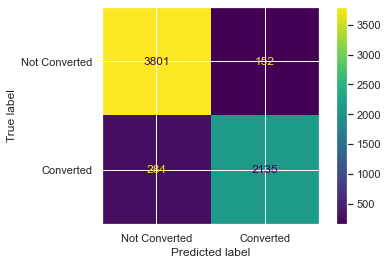

In [107]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ["Not Converted","Converted"])
cm_display.plot()
plt.show()

In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9315756434400502


In [110]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What is your current occupation_Unemployed,5.83
11,Tags_Will revert after reading the email,3.08
9,Tags_Other_Tags,2.11
10,Tags_Ringing,2.08
0,Total Time Spent on Website,1.92
3,What is your current occupation_Working Profes...,1.92
1,Lead Origin_Lead Add Form,1.78
5,Last Activity_SMS Sent,1.59
7,Tags_Interested in other courses,1.45
6,Tags_Closed by Horizzon,1.44


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [111]:
#dropping variable with high VIF

col = col.drop('What is your current occupation_Unemployed',1)

In [112]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1402.7
Date:                Tue, 15 Nov 2022   Deviance:                       2805.4
Time:                        20:40:22   Pearson chi2:                 7.25e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5883
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5676      0.087    -29.401      0.000      -2.739      -2.396
Total Time Spent on Website                              3.5905      0.204     17.580      0.000       3.190       3.991
Lead Origin_Lead Add Form                                1.9611      0.402      4.878      0.000       1.173       2.749
What is your current occupation_Working Professional     0.6158      0.357      1.723      0.085      -0.085       1.316
Lead Source_Welingak Website                             3.2717      0.829      3.948      0.000       1.648       4.896
Last Activity_SMS Sent                                   1.8891      0.105     18.032      0.000       1.684       2.094
Tags_Closed by Horizzon                                  5.6884      0.723      7.869      0.000       4.272       7.105
Tags_Interested in other courses                        -2.4211      0.359     -6.753      0.000      -3.124      -1.718
Tags_Lost to EINS                                        5.5579      0.723      7.692      0.000       4.142       6.974
Tags_Other_Tags                                         -2.4666      0.205    -12.013      0.000      -2.869      -2.064
Tags_Ringing                                            -3.1978      0.238    -13.423      0.000      -3.665      -2.731
Tags_Will revert after reading the email                 4.1897      0.183     22.893      0.000       3.831       4.548
========================================================================================================================
"""

p-value of variable What is your current occupation_Working Professional is high, so we can drop it.

In [113]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Working Professional',1)

In [114]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1404.3
Date:                Tue, 15 Nov 2022   Deviance:                       2808.5
Time:                        20:40:22   Pearson chi2:                 7.36e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5881
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.5654      0.087    -29.381      0.000      -2.736      -2.394
Total Time Spent on Website                  3.5900      0.204     17.579      0.000       3.190       3.990
Lead Origin_Lead Add Form                    1.9977      0.403      4.959      0.000       1.208       2.787
Lead Source_Welingak Website                 3.2325      0.829      3.899      0.000       1.608       4.857
Last Activity_SMS Sent                       1.8901      0.105     18.048      0.000       1.685       2.095
Tags_Closed by Horizzon                      5.7772      0.722      8.005      0.000       4.363       7.192
Tags_Interested in other courses            -2.3926      0.358     -6.682      0.000      -3.094      -1.691
Tags_Lost to EINS                            5.5822      0.722      7.730      0.000       4.167       6.998
Tags_Other_Tags                             -2.4539      0.205    -11.991      0.000      -2.855      -2.053
Tags_Ringing                                -3.2027      0.238    -13.437      0.000      -3.670      -2.736
Tags_Will revert after reading the email     4.3019      0.175     24.516      0.000       3.958       4.646
============================================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.81
9,Tags_Will revert after reading the email,1.76
1,Lead Origin_Lead Add Form,1.75
3,Last Activity_SMS Sent,1.52
2,Lead Source_Welingak Website,1.36
4,Tags_Closed by Horizzon,1.23
8,Tags_Ringing,1.12
7,Tags_Other_Tags,1.08
6,Tags_Lost to EINS,1.05
5,Tags_Interested in other courses,1.03


So, all VIFs are in order. Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.253505
5520    0.078007
1962    0.054174
1566    0.976201
9170    0.006566
5097    0.071402
8954    0.036922
309     0.896194
5519    0.337322
1050    0.969875
dtype: float64

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25350478, 0.07800653, 0.05417373, 0.97620055, 0.00656607,
       0.07140193, 0.03692154, 0.89619422, 0.3373221 , 0.9698748 ])

Since the logistic curve gives you just the probabilities and not the actual classification of 'Converted' and 'Not Converted', you need to find a threshold probability to classify customers as 'Converted' and 'Not Converted'. 

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.253505,7962
1,0,0.078007,5520
2,0,0.054174,1962
3,1,0.976201,1566
4,0,0.006566,9170


In [119]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.253505,7962,0
1,0,0.078007,5520,0
2,0,0.054174,1962,0
3,1,0.976201,1566,1
4,0,0.006566,9170,0


In [120]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3816  137]
 [ 387 2032]]


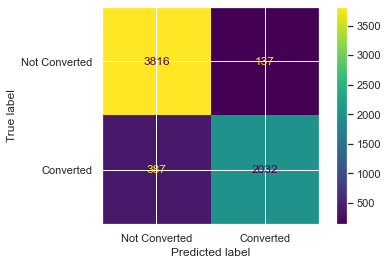

In [121]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ["Not Converted","Converted"])
cm_display.plot()
plt.show()

In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9177652228499686


#### Metrics beyond simply accuracy

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8400165357585779

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.9653427776372375

In [126]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03465722236276246


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.9368372521899493


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9079229122055674


## Step 8: PLOTTING ROC CURVE

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs):
    fpr,tpr, thresholds = metrics.roc_curve( actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'k--') #to draw a diagonal from [0,1]
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative rate]')
    plt.ylabel('True Positive Rate or Specificity')
    plt.title('Reciever Operative Characteristics Curve')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

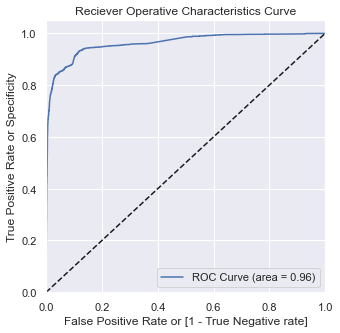

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

## Step 9: Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.253505,7962,0,1,1,1,0,0,0,0,0,0,0
1,0,0.078007,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.054174,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.976201,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006566,9170,0,1,0,0,0,0,0,0,0,0,0


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.833490  0.952460  0.760688
0.2   0.2  0.897050  0.933857  0.874526
0.3   0.3  0.902699  0.917735  0.893499
0.4   0.4  0.907564  0.860686  0.936251
0.5   0.5  0.917765  0.840017  0.965343
0.6   0.6  0.915097  0.821000  0.972679
0.7   0.7  0.910546  0.803224  0.976221
0.8   0.8  0.901130  0.766846  0.983304
0.9   0.9  0.876648  0.689955  0.990893


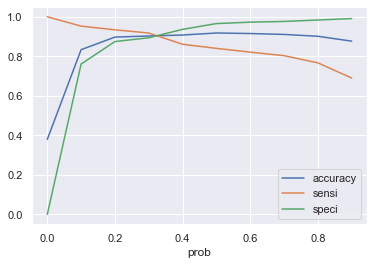

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [135]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.253505,7962,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.078007,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.054174,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.976201,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.006566,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [136]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.253505,7962,0,25
1,0,0.078007,5520,0,8
2,0,0.054174,1962,0,5
3,1,0.976201,1566,1,98
4,0,0.006566,9170,0,1


In [137]:
# Let's check the overall accuracy.
print("Accuracy" , metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Accuracy 0.9026993094789705


In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3532,  421],
       [ 199, 2220]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity" , TP / float(TP+FN))

Sensitivity 0.9177346010748243


In [141]:
# Let us calculate specificity
print("Specificity", TN / float(TN+FP))

Specificity 0.893498608651657


### Observation:
    
Above the model seems to be performing well. The ROC curve has a area value of 0.96, which is very good. We have the following values for the Train Data:

- Accuracy : 90.27%
- Sensitivity : 91.77%
- Specificity : 89.34%

#### Some of the other Stats are derived below, indicating the 

- False Positive Rate
- Positive Predictive Value
- Negative Predictive Values
- Precision & Recall

In [142]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print("False Postive Rate" , FP/ float(TN+FP))

False Postive Rate 0.10650139134834304


In [143]:
# Positive predictive value 
print ("Positive Predictive Rate" , TP / float(TP+FP))

Positive Predictive Rate 0.8405906853464596


In [144]:
# Negative predictive value
print ("Negative predictive rate" , TN / float(TN+ FN))

Negative predictive rate 0.9466630930045564


In [145]:
## Precision and Recall

In [146]:
## Precision
print("Precision" , TP / (TP + FP))

Precision 0.8405906853464596


In [147]:
## Recall

print("Recall" , TP / (TP + FN))

Recall 0.9177346010748243


In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted) # same as above

0.8405906853464596

In [150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted) # same as above

0.9177346010748243

In [151]:
## Precision and recall tradeoff: precision_recall_curve

In [152]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

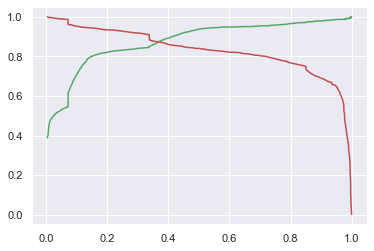

In [153]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

## Step 10: Making predictions on the test set

In [154]:
#scaling test set

X_test[Numeric_cols] = scaler.transform(X_test[Numeric_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,0,0.272727,0.188194,0.500000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4050,0,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7201,1,0.181818,0.316023,0.333333,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1196,0,0.363636,0.187750,0.666667,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8219,0,0.636364,0.109632,0.291667,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [155]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,0.188194,0,0,0,0,0,0,0,1,0
4050,0.000000,1,0,1,0,0,0,0,0,1
7201,0.316023,0,0,1,0,0,0,1,0,0
1196,0.187750,0,0,0,0,0,0,0,1,0
8219,0.109632,0,0,0,0,0,1,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)

In [157]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.006105
4050    0.996404
7201    0.119768
1196    0.006096
8219    0.968030
8747    0.071402
9048    0.549252
6524    0.008619
7693    0.052405
8187    0.132349
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3504,0.006105
4050,0.996404
7201,0.119768
1196,0.006096
8219,0.968030


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
3504,0,3504
4050,1,4050
7201,0,7201
1196,0,1196
8219,1,8219


In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.006105
1,1,4050,0.996404
2,0,7201,0.119768
3,0,1196,0.006096
4,1,8219,0.968030


In [163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.006105
1,1,4050,0.996404
2,0,7201,0.119768
3,0,1196,0.006096
4,1,8219,0.968030


In [164]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.006105,1
1,4050,1,0.996404,100
2,7201,0,0.119768,12
3,1196,0,0.006096,1
4,8219,1,0.968030,97


In [165]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.006105,1,0
1,4050,1,0.996404,100,1
2,7201,0,0.119768,12,0
3,1196,0,0.006096,1,0
4,8219,1,0.968030,97,1


In [166]:
# Let's check the overall accuracy for test set
print("Accuracy", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Accuracy 0.9040644452581472


In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1507,  182],
       [  80,  962]], dtype=int64)

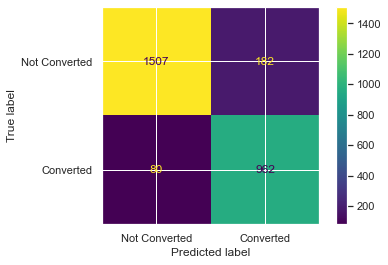

In [168]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion2, display_labels = ["Not Converted","Converted"])
cm_display.plot()
plt.show()

In [169]:
# Other Metrics 

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity", TP / float(TP+FN))

Sensitivity 0.9232245681381958


In [172]:
# Let's see the specificity of our logistic regression model
print("Specificity", TN / float(TN+FP))

Specificity 0.8922439313203079


In [173]:
print("Precision_score", precision_score(y_pred_final.Converted , y_pred_final.final_Predicted))

Precision_score 0.8409090909090909


In [174]:
print("Recall_score", recall_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Recall_score 0.9232245681381958


### Observation:

After running the model on the Test Dataset these are the figures we have obtained:

- Accuracy : 90.41%
- Sensitivity : 92.32%
- Specificity : 89.22%

## Final Observation:

#### Train dataset:

- Accuracy : 90.27%
- Sensitivity : 91.77%
- Specificity : 89.34%
    
#### Test dataset:

- Accuracy : 90.41%
- Sensitivity : 92.32%
- Specificity : 89.22%
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model